### 웹 스크래핑(Web Scrapping)

#### 1. 개념
* 웹 스크래핑(Web Scrapping): 웹사이트상에서 특정부분에 위치한 정보를 컴퓨터로 하여금 자동으로 추출하여 수집하는 기술
* 웹 크롤링(Web Crawling) : 자동화 봇인 web crawler가 정해진 규칙에 따라 복수개의 웹페이지를 브라우징 하는 작업

#### 2. 웹스크래핑을 위한 라이브러리

* BeautifulSoup
* scapty

#### 3. 파이썬으로 크롤링하기

크롤링의 정의는 `크롤링 crawling 또는 스크랩핑 scraping`은 웹피이지를 그대로 가져와서 해당 페이지에서 데이터를 추출해 내는 행위이다.

##### 크롤링 또는 스크래핑방법
1. 원하는 페이지에 request를 보낸 결과를 html로 받는다.
2. 받은 html을 파싱한다.
3. 필요한 정보만 추출한다.

파이썬을 이용해서 웹 크롤러를 만들기 위해서는 `http request/reponse` 를 다루는 모듈과 html을 파싱하는 모듈이 필요하다.

> 참고사이트
* https://www.crummy.com/software/BeautifulSoup
* https://docs.python.org/3.0/library/urllib.request.html

##### 1. 웹스크래핑- html소스 읽기

In [ ]:
# 1. html 소스 읽기
from urllib.request import urlopen
# urlopen?
html = urlopen('http://google.com')
# display(html) # 객체의 정보만 출력
# display(dir(html))
# display(html.read())

In [ ]:
# 2. 예외처리방법
from urllib.error import HTTPError
from urllib.error import URLError

try:
    # urlopen()에서 리턴되는 객체는 HttpResponse객체이다.
    html = urlopen("http://java.com") # url 없는 사이트 주소, 즉 에러발생
except HTTPError as e:
    print('http 에러 ...')
except URLError as e:
    print('존재하지 않는 사이트주소입니다.')
else:
    print(html.read())


In [ ]:
# 3. 이미지 다운로드 방법(1) - 간편한 방법 
import urllib.request

#  daum사이트의 로고에서 마우스 우클릭 > 이미지주소복사
url = 'https://t1.daumcdn.net/daumtop_chanel/op/20170315064553027.png'
savefilename ='./images/daum.png'

urllib.request.urlretrieve(url,savefilename)
print('파일저장 완료')



In [ ]:
# 4. 이미지 다운로드 방법(2) - 바인너리파일로 처리

# 구글사이트에 로고파일을 다운로드
url = 'http://www.google.com/images/branding/googlelogo/2x/googlelogo_color_272x92dp.png'
savefilename='./images/google.png'

# 다운로드된 이미지 파일을 메모리에 저장
image =urllib.request.urlopen(url).read()
print(type(image))

# 바이너리 파일로 저장

with open(savefilename, mode='wb') as f:
    # 메모리에 저장된 이미지 파일로 저장
    f.write(image)
    print('저장되었습니다')

In [ ]:
# 5. 매개변수를 추가하여 인터넷 리소스를 요청하는 방법
# 기상청의 일기예보 사이트: http://www.kma.go.kr

# 기상청 육상중기 일기예보
API = 'http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp'

# url에 특수문자, 한글이 포함된 경우에는 URL 인코딩이 필요
# 지역번호 : 전국 108, 서울/경기 109, 강원 105,충북 131, 충남 133, 전북 146,
#            전남 156, 경북 143, 경남 159, 제주 184

values = {'stnId':'108'} # 전국옵션
# values = {'stnId':'109'} # 서울/경기

# url에 한글, 특수문자가 포함될 경우 encoding
params = urllib.parse.urlencode(values) # 한글이 잇을 경우

# 요청전용 URL 생성 
url = API +"?"+params
print('url =',url)

# 다운로드
data = urllib.request.urlopen(url).read()
# print(data)

# decoding
text = data.decode('utf-8')
print(text)


### 스크래핑(scrapping) -beautifulsoup


In [ ]:
# 1. BeatifulSoup : HTML 파싱 라이브러리
# https://www.crummy.com/software/BeautifulSoup
# pip install beautifulsoup4 or conda install beautifulsoup4
# 4를 생략하면 버전 3.x 가 설치가 된다.
# stackoverflow
from urllib.request import urlopen
from bs4 import BeautifulSoup

# https://stackoverflow.com의 메인페이지의 타이틀 텍스트 가져오기
# url에 접속하여 연결된 후에 HttpResponse 객체를 생성
html = urlopen('https://stackoverflow.com')
# html.read() -> html소스
# BeautifulSoup의 기본 분석기를 이용하여 html을 분석하기 위한 객체를 생성
# xml 분석기 : ixml
bs = BeautifulSoup(html.read(), 'html.parser')
# print(bs)
print(type(bs))

# 문서내의 맨 처음 객체의 h1을 선택
print(bs.h1)

In [ ]:
# 2. next_sibling
from bs4 import BeautifulSoup as bs

# 분석하고자 하는 html
html="""
<html><body>
    <h1>Hellow Web Scraping</h1>
    <p>웹 페이지 분석</p>
    <p>웹 스크래핑</p>
</body></html>
"""

# HTML 분석 - html.parser(기본파서) 분석기 사용
# Ixml등의 외부 파서도 사용할 수 있다.
soup = bs(html,'html.parser')
soup

# 원하는 정보를 추출하기
h1 = soup.html.body.h1
h1
p1 = soup.html.body.p
p1

# sibling 형제노드 (동일 레벨의 모드)
# previous_sibling : 동일 레벨의 이전 노드 
# next_sibling : 동일 레벨의 다음 노드
# 선택되는 과정 : 첫번째 p 태그의 </p>뒤의 공백문자, 그 뒤의 <p>태그 내용
type(p1)
# p2 = p1.next_sibling # 한번만 해줄 경우 다음 노드인 줄바꿈 문자 \n이 나온다.
p2 = p1.next_sibling.next_sibling # 다음 p 태그
p2

# 요소의 글자를 출력하기
print('h1 = ', h1.string)
print('p1 = ',p1.string)
print('p2 = ',p2.string)

In [ ]:
print(dir(soup))

In [ ]:
# 3. find()

from bs4 import BeautifulSoup as bs

# 분석하고자 하는 html
html="""
<html><body>
    <h1 id="title">Hellow Web Scraping</h1>
    <p id="body">웹 페이지 분석</p>
    <p>웹 스크래핑</p>
</body></html>
"""
# html 분석: html.parser분석기 사용
soup = bs(html,'html.parser')

# find()메서드로 원하는 부분을 추출
title = soup.find(id='title') # id가 title인 태그
body = soup.find(id='body') # id가 body인 태그

print("title = ",title)
print("title = ",title.string)

print("title = ",body)
print("title = ",body.string)

In [ ]:
# 4. find_all() : id속성
# 분석하고자 하는 html
html="""
<html><body>
    <ul>
       <li><a href="http://daum.net">daum</a></li>
       <li><a href="http://google.com">google</a></li>
       <li><a href="http://yahoo.com">yahoo</a></li>
       <li><a href="http://nate.com">nate</a></li>
       <li><a href="http://naver.com">naver</a></li>
    </ul>
</body></html>
"""

# html분석
soup = bs(html,'html.parser')

# find_all() 메서드로 a태그를 추출
# soup.find_all?
links = soup.find_all('a')
type(links) # bs4.element.ResultSet 형은 파이썬의 list 자료형
print(links)

# links 목록 출력
for link in links:
    text = link.string
    print(text)
    # 태그내부의 속성 가져오기 : attrs[속성명] 
    href = link.attrs['href']
    print(text, '=', href)

In [ ]:
# 5. css 처리 : select_one()/select()

html="""
<html><body>
    <div id='main'>
        <h1>도서 목록</h1>
        <ul>
           <li>자바프로그램 입문</li>
           <li>파이썬 머신러닝</li>
           <li>HTML5/CSS3</li>
        </ul>
    </div>
</body></html>
"""

soup = bs(html,'html.parser')

# 필요한 부분을 css로 추출
# h1의 '도서목록' 추출, select_one()메서드 사용 
soup.h1.string
h1 = soup.select_one('div#main>h1').string # 1개의 tag를 가져옴
print(type(h1))
print(h1)

# li목록 : select()메서드 사용 
# 안될경우 태그부분 공란
li_list = soup.select('div#main > ul > li') # 여러개의 tag 가져오기
# li_list = soup.select('div#main>ul.items>li') # 여러개의 tag 가져오기

print(li_list) # list로 정렬됨
for li in li_list:
    print(li.string)

##### 실습1. 기상청의 일기예보

In [ ]:
# 태그의 텍스트 find().string
from bs4 import BeautifulSoup as bs
import urllib.request as req
# "# 결과\n",
#     "'''\n",
#     "기상청 육상 중기예보\n",
#     "○ (강수) 9일(목)은 강원영동에, 12일(일)은 충청도와 전라도, 경북에 비가 오겠습니다.\n",
#     "○ (건조) 이번 예보기간(9~16일) 전국이 대체로 맑고 대기가 매우 건조하겠으니, 산불 등 화재예방에 각별히 유의하기 바랍니다.\n",
#     "○ (기온) 이번 예보기간(9~16일) 낮 기온은 어제(5일, 9~18도)와 비슷하거나 조금 높은 13~22도로 포근하겠습니다.\n",
#     "○ (주말전망) 11일(토)은 대체로 맑겠고, 12일(일)은 충청도와 전라도, 경북에 비가 오겠습니다.\n",
#     "'''"
url= 'http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp'
html= req.urlopen(url)

soup = bs(html.read(),'html.parser')
title = soup.select_one('header>title')
title
wfs = soup.find('wf')
wfs = wfs.string.split('<br />')
# wfs = wfs.replace('<br / >',"")
print(title.string)
for wf in wfs:
    print(wf)
# title = # title 문자열 찾고 wf 스크랩 해서 가져오기
# wf = # wf tag 



##### 실습2. 네이버 금융에서의 환율정보 가져오기

In [ ]:
from bs4 import BeautifulSoup as bs
import urllib.request as req

url = "http://finance.naver.com/marketindex"
html = urlopen(url)
soup = bs(html.read(),'html.parser')
soup
# class 가 head_info 인 div로부터 class가 value인 span 태그를 선택 후 string 가져오기
# ex_rates = soup.select_one('div.head_info > span.value')
# print(ex)
ffs = soup.select_one('#exchangeList >li.on>a>div>span.value')
print("usd/krw",ffs.string)
# 결과
# usd/krw = 1.231.80

In [ ]:
ex_rates = soup.select('div.head_info > span.value')
print(ex_rates)
for exrate in ex_rates:
    print(exrate.string) # 통화별 환율 구분은 별도로 추출해야 한다.

##### 실습3 . 윤동주 시인의 작품목록

In [ ]:
from bs4 import BeautifulSoup as bs
import urllib.request as req
# 웹브라우저의 F12개발자도구, elements에서 원하는 부분을 선택후 우클릭
# Copy > Copy selector

# 뒤의 인코딩 부분은'저자: 윤동주'라는 의미
# 따로 입력하지 않고 위키문언 홈페이지에서 주소를 복사해서 사용
# 저자: 윤동주가 인코딩되어서 아래와 같이 복사가 된다.
url = "https://ko.wikisource.org/wiki/%EC%A0%80%EC%9E%90:%EC%9C%A4%EB%8F%99%EC%A3%BC"
html= urlopen(url)
soup = bs(html.read(),'html.parser')
soup
titles = soup.select('div.mw-parser-output>ul>li>a')
titles
for title in titles:
    if title.string=='증보판':
        pass
    else:
        print('...',title.string)
# content > div.mw-indicators.mw-body-content
# 결과
# .....증보판
# .....흰 그림자
# ..... 사랑스러운 추억
# ... 흐르는 거리
# ... 봄

##### BeautifulSoup 메서드


In [ ]:
html = '''<!DOCTYPE html>
<html>
<head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">
    Once upon a time there were three little sisters; and their names were
    <a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>
    <a href="http://example.com/lacie" class="sister" id="link2">Lacie</a>
    <a href="http://example.com/tillie" class="sister brother" id="link3">Tillie</a>
    and they lived at the bottom of a well.,
</p>
</body>
</html>
'''

soup = bs(html,'html.parser')

# 1. element
print(soup.title)
print(soup.find('title'))
print()
#2. tag
print(soup.title.name)
print()
# 3. text
print(soup.title.string)
print(soup.title.get_text())
print()
# 4.single element
print(soup.a.get_text())
print(soup.find('a').get_text())
print()

# 5. multi-element
print(soup.find_all('a'))
print(soup.find_all('a')[0].get_text())
print(soup.find_all('a')[1].get_text())
print(soup.find_all('a')[2].get_text())
print()

# 6. attribute
print(soup.a['class'])
print(soup.a.get('class'))
print(soup.a['href'])
# print(soup.a,attrs['href'])

print()
# 7. find by id
print(soup.find(id='link1'))
print(soup.find('',{'id':'link1'}))
print()

# 8. find by class : class는 'class_'로 정의해야 한다.
print(soup.find_all(class_ = 'sister')) # class_ 로 사용해야함 예약어이기 때문이다.
print(soup.find_all('',{'class':'sister'}))

#### 3. 고급HTML 분석

In [ ]:
# 1. 전쟁과 평화
from bs4 import BeautifulSoup as bs
import urllib.request as req

# 전쟁과 평화

html = req.urlopen('http://www.pythonscraping.com/pages/warandpeace.html')
soup = bs(html,'html.parser')

# span 태그에서 class가 green인 태그들
# findAll(), find_all()
names = soup.findAll('',{'class':'green'})
names

for name in names:
    print(name.get_text())

In [ ]:
# 2. 웹페이지에서의 모든 h 태그를 추출
# 리스트 안에 for 문 사용해서 출력
titles = soup.findAll(['h1','h2','h3','h4','h5','h6']) #find_all(['h1','h2','h3','h4','h5','h6'])
print([title.string for title in titles])
print([title.get_text() for title in titles])

In [ ]:
# 3. span 태그중에서 class가 green, red인 태그
# 리스트 안에 for 문을 이용하여 출력
all_tests =soup.findAll('span',{'class':{'green','red'}})
print([all_test.get_text() for all_test in all_tests])

In [ ]:
# 4 . wordcount
# 'the prince' 단어의 갯수를 출력
title = soup.findAll(text='the prince')
len(title)

In [ ]:
# 5. 자식노드 수집하기
html = req.urlopen('http://www.pythonscraping.com/pages/page3.html')
soup = bs(html,'html.parser')
# soup.find('table',{'id':'giftList'}).children
# table태그중에서 id가 giftList인 태그의 자식 노드를 추출
# 자식노드 bs.find().children 메서드
for child in soup.find('table',{'id':'giftList'}).children:
    print(child)


In [ ]:
# 6. next_siblings
html = req.urlopen('http://www.pythonscraping.com/pages/page3.html')
soup = bs(html,'html.parser')
# table태그중에서 id가 giftList인 태그의 자식 노드를 추출
# 자식노드 soup.find().tr.next_sibilings 메서드
# sibling : next_sibilings, previous_sibilings
# 제목행은 제거하고 검색
for sibling in soup.find('table',{'id':'giftList'}).tr.next_siblings:
    print(sibling)

In [ ]:
# 6. previous_siblings
html = req.urlopen('http://www.pythonscraping.com/pages/page3.html')
soup = bs(html,'html.parser')
# img1.jpg의 부모노드의 이전 형제 노드의 텍스트값
# img1.jpg의 parent, prevous_sibling 사용
for sibling in soup.find('table',{'id':'giftList'}).img.previous_siblings:
    print(sibling)

##### jason 분석

In [ ]:
# json탑색 : {key:value}
import json

json_str =\
'{"amount":[{"num":0},{"num":1},{"num":2}],\
  "fruits":[{"fruit":"apple"},{"fruit":"banana"},{"fruit":"pear"}]\
}'
json_str

dict_data = json.loads(json_str) # dict 형으로 리턴
print(type(dict_data))
print()
print(dict_data.get("fruits"))
print(dict_data.get("fruits")[0])
print(dict_data.get("amount")[1].get("num"))
print(dict_data.get("fruits")[2].get("fruit"))


##### pdf 분석

* pip install pdfminer3k

In [ ]:
!pip install pdfminer3k

In [ ]:
# pdf 문서 읽기
from pdfminer.pdfinterp import PDFResourceManager, process_pdf
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from io import StringIO
from io import open

In [ ]:
def readPDF(pdfFile):
    # pdf 리소스 매니저 객체 생성
    rsrcmgr = PDFResourceManager() 
    # 문자열 데이터를 파일처럼 처리하는 stringio -> pdf 파일이 여기 담김
    retstr = StringIO()
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, laparams=laparams)
    
    process_pdf(rsrcmgr, device, pdfFile)
    device.close()
    
    content = retstr.getvalue()
    retstr.close()
    
    return content

# 전쟁과 평화 pdf
pdfFile = req.urlopen('http://pythonscraping.com/pages/warandpeace/chapter1.pdf')
outputString = readPDF(pdfFile)
print(outputString)
pdfFile.close()


##### 데이터 저장

In [ ]:
# 웹페이지의 내용을 분석하여 csv 파일로 저장
# table태그의 내부 텍스트를 저장
import csv

html = req.urlopen('http://en.wikipedia.org/wiki/Comparison_of_text_editors')
soup = bs(html,'html.parser')
# class가 wikitable인 태그중에서 첫번째 태그를 선택
table =soup.findAll('table',{'class':'wikitable'})[0]
rows = table.findAll('tr')

csv_file = open('../data/web/editors.csv', 'wt', newline='', encoding='utf-8')

writer = csv.writer(csv_file)
try:
    for row in rows:
        csv_row=[]
        # td, th 태그의 내용을 리스트에 추가
        for cell in row.findAll(['td','th']):
            csv_row.append(cell.get_text())
        writer.writerow(csv_row)
finally:
    print('파일이 저장되엇습니다')
    csv_file.close()

In [ ]:
# 연습문제 1. 
# 다음 사이트에서 링크가 되어 있는 모든 제목을 가져와서 출력하기

from bs4 import BeautifulSoup as bs
import urllib.request as req

html = req.urlopen('http://media.daum.net/digital')
soup = bs(html,'html.parser')
names = soup.select('a')
for name in names:
    print(name.get_text().strip())
    

In [ ]:
# 연습문제 2.
# 네이버 사이트 이미지 검색 후 ./data/web'에 한번에 다운로드 및 저장하기(10건정도) 검색어를 전달받아서 결과를 저장
# * https://search.naver.com/search.naver?sm=tab_hty.top&where=image&query=코로나
# url에 한글, 특수문자가 포함될 경우 encoding
import urllib.request 
import urllib.parse
value= '코로나'
encode = urllib.parse.quote_plus(value)
url= 'https://search.naver.com/search.naver?sm=tab_hty.top&where=image&query='+encode
response =  urllib.request.urlopen(url).read()
soup = bs(response,'html.parser')
# image = soup.select('html>body>div.wrap>div.sp_image section _prs_img_noc>div>div.photowall _photoGridWrapper')
images = soup.select('div.img_area>a.thumb>img')
im =[]
for image in images:
    if len(im)>10:
        break
    else:
        print(image.attrs['data-source'])
        im.append(image.attrs['data-source'])
        
for i in range(len(im)):
    urllib.request.urlretrieve(im[i],'../data/web/naver_image{i}.png'.format(i=i))
    


#### 4. 웹사이트 정보를 mysql에 저장

##### 1. mysql database & table 생성 
네비캣 mysql에 생성
>* create database pyweb default character set utf-8;
* create table pages(\
    id int not null auto_increment primary key,\
    title varchar(200),\
    content text,\
    created timestamp default current_timestamp
)

##### 2. mysql 연결하기

> * !pip install pymysql or !conda install pymysql
* pysql.connect(host='localhost',port=3306,user='root',passwd='12345',\
  db='pyweb',charset='utf8')

In [ ]:
from bs4 import BeautifulSoup as bs
import urllib.request as req
import re
import datetime
import random
import pymysql

In [ ]:
# mysql 연결
conn = pymysql.connect(host='localhost',port=3306,user='root',passwd='12345',\
                       db='pyweb',charset='utf8')
print(type(conn))
print(dir(conn))
# conn?

In [ ]:
cursor=conn.cursor()
cursor.execute('use pyweb')
cursor.execute('delete from pages')
conn.commit()

In [ ]:
# 고정된 랜덤값을 얻기 위해서 seed를 설정
random.seed(datetime.datetime.now())
# 저장을 위한 함수 
def store(title,content): # 테이블에 저장 
    # 따옴표처리
    title = title.replace("'","''") # 작은 따움표 한개를 2개로 치환
    title = title.replace('"','\'') # 큰 따옴표는 '\'로 치환
    content = content.replace("'","''")
    content = content.replace('"','\'')
    content = content.replace('\n','') # '\n'은 공란으로 변경
    
    sql = 'insert into pages(title,content) values("%s","%s")'%(title,content)
    cursor.execute(sql)
    conn.commit()


def getLinks(url): # 웹사이트 링크 
    html = req.urlopen('https://en.wikipedia.org/'+url)
    soup = bs(html,'html.parser')
    title = soup.find('h1').get_text()
    content = soup.find('div',{'id':'mw-content-text'}).find('p').get_text()
    store(title, content)
    # ^: 시작, $ : 끝 *: 반복
    # ^(/wiki/) : /wiki/로 시작 되는 a 태그를 출력
    # ((?!:).) : 마침표(.)로 끝나는 문자에서 ?,!,:을 검색
    # /wiki/ + 문자열+ .의 패턴에서 문자열중 ?,!,:을 검색
    return soup.find('div',{'id':'bodyContent'}).findAll('a',href=re.compile("^(/wiki/)((?!:).)*$"))
                        
                        
                        

In [ ]:
links = getLinks('/wiki/Kevin_Bacon')
# print(links)
# print(type(links))
print(len(links))

try:
    count = 0
    while len(links)>0:
        idx = random.randint(0,len(links)-1)
        newArticle = links[idx].attrs['href']
        print(newArticle,idx)
        links = getLinks(newArticle)
        count +=1
        if count >= 5: 
            break
except Exception as e:
    print('저장 실패')
else:
    print('저장성공')
finally:
    cursor.close()
    conn.close()

##### 2. oracle database

>* pip install cx_oracle or conda install cx_oracle

>* create table product(\
product_id number,\
procuct_name varchar2(50),\
price number default 0,\
decription clob,\
picture_url varchar2(500),\
primary key(product_id)\
);\
* insert into product select 1, '레몬', 1500, '레몬에 포함된 구연산은 피로회복에... ', 'lemon.jpg' from dual;
* insert into product select 2, '오렌지', 2000, '오렌지에 포함된 구연산은 피로회복에. ', 'orange.jpg' from dual;
* insert into product select 3, '키위', 2500, '키위에 포함된 구연산은 피로회복에... ', 'kiwi.jpg' from dual;
* insert into product select 4, '포도', 3000, '포도에 포함된 구연산은 피로회복에... ', 'grape.jpg' from dual;
* commit;


In [ ]:
import cx_Oracle as oracle

In [ ]:
# 오라클 연결
dsn = oracle.makedsn('localhost',1521, 'XE')
conn = oracle.connect('scott','tiger',dsn)
cursor = conn.cursor()
sql = 'delete from product1'
cursor.execute(sql)
conn.commit()
conn.close()

In [ ]:
# 1. 자료추가 - 여러건을 추가

In [ ]:
dsn = oracle.makedsn('localhost',1521, 'XE')
conn = oracle.connect('scott','tiger',dsn)
cursor = conn.cursor()
items=[
    (1, '레몬', 1500, '레몬에 포함된 구연산은 피로회복에... ', 'lemon.jpg'),
    (2, '오렌지', 2000, '오렌지에 포함된 구연산은 피로회복에. ', 'orange.jpg'),
    (3, '키위', 2500, '키위에 포함된 구연산은 피로회복에... ', 'kiwi.jpg'),
    (4, '포도', 3000, '포도에 포함된 구연산은 피로회복에... ', 'grape.jpg')
]
sql ='insert into product1 values(:1,:2,:3,:4,:5)'
for item in items:
    cursor.execute(sql, item)
    
conn.commit()
conn.close()

In [ ]:
# 1. 자료추가(2) - 일괄추가
dsn = oracle.makedsn('localhost',1521, 'XE')
conn = oracle.connect('scott','tiger',dsn)
cursor = conn.cursor()
items=[
    (1, '레몬', 1500, '레몬에 포함된 구연산은 피로회복에... ', 'lemon.jpg'),
    (2, '오렌지', 2000, '오렌지에 포함된 구연산은 피로회복에. ', 'orange.jpg'),
    (3, '키위', 2500, '키위에 포함된 구연산은 피로회복에... ', 'kiwi.jpg'),
    (4, '포도', 3000, '포도에 포함된 구연산은 피로회복에... ', 'grape.jpg')
]
sql ='insert into product1 values(:1,:2,:3,:4,:5)'

cursor.bindarraysize = len(items)
cursor.executemany(sql, items) # for문 대신 일괄처리 - 속도가 빠르다.

conn.commit()
conn.close()


In [ ]:
# 2. 자료 조회(1) - 기본 조회 방법
dsn = oracle.makedsn('localhost',1521, 'XE')
conn = oracle.connect('scott','tiger',dsn)
cursor = conn.cursor()

sql='select * from product1'
cursor.execute(sql)

for row in cursor:
    print(row)
    desc = row[3].read() # clob 필드를 읽는 방법
    print(desc)
    
cursor.close()
conn.close()

In [ ]:
# 3. 자료조회(2) - 전체조회후 리스트로 저장
dsn = oracle.makedsn('localhost',1521, 'XE')
conn = oracle.connect('scott','tiger',dsn)
cursor = conn.cursor()

sql = 'select * from product1'
cursor.execute(sql)
rs = cursor.fetchall() # fetchall() 모든 자료를 처리
print(type(rs))
for row in rs:
    print(row[0],row[1],row[2],row[3],row[4])
cursor.close()
conn.close()

In [ ]:
# fetchone() : 자료 한건 처리
dsn = oracle.makedsn('localhost',1521, 'XE')
conn = oracle.connect('scott','tiger',dsn)
cursor = conn.cursor()

sql = 'select count(*) from product1'
cursor.execute(sql)
count = cursor.fetchone() # tuple로 리턴
print(type(count))
print('product count =', count)


cursor.close()
conn.close()

#### 5. 웹사이트 캡쳐
phantomjs

>1. phantomjs 다운로드
>>* 화면이 없고 커맨드라인상에서 웹브라우저를 제어할 수 있는 브라우저
>>* 웹 개발 테스트 및 성능 측정, 스크린 샷 제작등에 활용
>>* 다수의 웹사이트는 BeautifulSoup을 사용하여 parsing 할 수가 있는데 요즘 사이트들은 javascript에서 html을 만들어서 실행되는 동적 페이지가 있다.  BeautifulSoup은 javascript를 실행해주지 않기 때문에 parsing을 제대로 동작하지 않는다. 이를 해결하기 위해서 javascript가 동적으로 페이지가 완성된 후에 parsing할 수 있는 방법을 phandomjs등이 있다.
>>* http://phantomjs.org/download.html
>>* https://bitbucket.org/ariay/phantomjs/downloads/phantomjs-2.1.1-window.zip
>>* 다운로드 파일을 d:/yourname/python/phantomjs폴더에 압축해제

> 2. pip install selenium or conda install selenium
>>* 주로 웹앱을 테스트하는 데 이용하는 패키지이다. `webdriver`라는 API를 통해 운영체제에 설치된 chrome등의 웹 브라우저를 제어하게 된다.
>>* `Selenium`은 diriver객체를 통해 여러가지 메서드를 제공한다.
>>> * url에 접근하는 api 
     - get('http://google.com')
>>> * 페이지의 단일 element에 접근하는 api
>>> - find_element_by_name('HTML_name')
>>> - find_element_by_id('HTML_id')
>>> - find_element_by_xpath('html/body/some/xpath')
>>> * 페이지의 복수의 element에 접근하는 api
>>> - find_element_by_css_selector('#css>div.selector')
>>> - find_element_by_css_name('class_name')
>>> - find_element_by_tag_name('h1')
>> * selenium을 이용해 크롬을 사용하려면 로컬에 chrome 설치 및 chromedriver를 다운 받아야 한다.

In [17]:
# 웹사이트화면을 이미지로 캡처하기
from selenium import webdriver
from selenium.webdriver.remote.webelement import WebElement
from selenium.webdriver import ActionChains

# phantomjs실행경로
driver = webdriver.PhantomJS(executable_path='./phantomjs/bin/phantomjs')

# 시간지연 5초대기 : 화면을 캡쳐하기 위한 대기시간 설정
driver.implicitly_wait(5)
#river.get('http://google.com')
#driver.get('http://daum.net')
driver.get('http://naver.com')

# 웹사이트 화면을 이미지로 저장
driver.get_screenshot_as_file('../data/web/screen.png')
driver.close()
print('파일 저장완료')

파일 저장완료


#### 6. 로그인이 필요한 사이트에서 데이터수집

로그인이 필요한 사이트에서는 쿠키, 세션등의 인증수단이 필요하며, 웹 스크래핑코딩상에 추가로 처리해야할 작업이 생긴다. 웹 브라우저의 개발자도구(f12)의 Network 탭을 보면 어떤 url에서 로그인 관련 입증이 처리되는지 볼 수가 있다.(ex : logln_check.do등)

단,로그인을 https로 막아놓은 사이트는 해당이 되지 않는다. 해당 사이트를 암호해해서 막아 놓았기 때문이다. 하지만 아직까지 막아ㅗㄶ지 않은 곳에 많이 있다.

Network에서 Header텝에 좌측 url목록에서 인증이 처리되는 url을 확인(클릭)한 후에 우측 하단의 맨 밑에 Form Data부분에 로그인 변수와 값을 조회할 수가 있다.(단, 사이트마다 좀 다르다.)

In [35]:
# 1. 한빛 미대어
# 로그인 사이트에서 다운하기
# 로그인을 위한 모듈 추출하기
import requests
from bs4 import BeautifulSoup as bs
from urllib.parse import urljoin

# 한빛 아이디와 비밀번호를 지정 
USER = 'rkdansrn2005'
PASS = 'zkmg6368'

# 세션 시작하기
session = requests.session()

# 로그인 하기 
login_info = {
    'm_id':USER,
    "m_passwd":PASS
}

# 한빛 미디어 로그인 페이지
url_login = 'http://www.hanbit.co.kr/member/login_proc.php'
res = session.post(url_login, data=login_info)
res.raise_for_status() # 오류가 발생하면 예외가 발생한다.

# 마이페이지 접근하기
url_mypage = 'http://www.hanbit.co.kr/myhanbit/myhanbit.html'
res = session.get(url_mypage)
res.raise_for_status()

soup = bs(res.text, "html.parser")
# print(soup)

# 마일리지와 ecoin 가져오기
mileage = soup.select_one('.mileage_section1 > dd > span').get_text()
ecoin = soup.select_one('.mileage_section2 > dd > span').get_text()
print(ecoin)
print(mileage)
# # # 회원이름과 등급
name = soup.select_one('.my_rating > p').get_text()
grade = soup.select_one('.my_rating > p > span').get_text()
name = name.split(')')
name = name[0].replace('(', '')
print('이름 =',name)
print('등급 =',grade)

0
3,000
이름 = 강문구
등급 = 일반


##### 7. 크롬으로 네이버에 로그인하기

selenium은 webdriver라는 것을 통해 디바이스에 설치된 웹브라우저를 제어할 수 있다. Chrome을 사용할 경우에는 `Chrome WebDriver`를 설치해야 한다.

1. 다운로드 : http://sites.google.com/a/chromium.org/chromedriver/download
2. 압축해제 : d:/yourname/python

In [44]:
# 1. 웹 사이트 제어 : 크롬으로 네이버 로그인하기(1) - 캡쳐로직 미적용 
from selenium import webdriver
USER = 'rkdansrn2005'
PASS = '1024314'

# driver = webdriver.PhantomJS(executable_path='./phantomjs/bin/phantomjs')
browser = webdriver.Chrome('D:/kangmoonku/html5/python/chromedriver')
# 시간지연 10초대기 : 화면을 캡쳐하기 위한 대기시간 설정
browser.implicitly_wait(2)

# 로그인 페이지에 접근
url_login = 'https://nid.naver.com/nidlogin.login'
browser.get(url_login)
print('웹페이지 접근중...')

# 텍스트박스에 아이디와 비밀번호 입력하기
e= browser.find_element_by_id('id')
# e.clear()
e.send_keysd_keys(USER)
a= browser.find_element_by_id('pw')
# e.clear()
a.send_keysd_keys(PASS)

# 입력양식을 전송해서 로그인하기
form = browser.find_element_by_css_selector("input.btn_global[type=submit]")
form.submit()
print('로그인버튼클릭 : 로그인중...')

# 쇼핑페이지의 데이터 가져오기
browser.get('https://order.pay.naver.com/home?tabMenu=SHOPPING')

# 쇼핑목록 출력하기
products = browser.find_element_by_css_selector('div.p_inr>div.p_info>a>span')
print(products)
for product in products:
    print("-",product)

웹페이지 접근중...


AttributeError: 'WebElement' object has no attribute 'send_keysd_keys'

In [70]:
# 2. 웹사이트 제어 : 크롬으로 네이버 로그인 하기(2) - 캡처로직 적용
from selenium import webdriver
import time
id = 'rkdansrn2005'
pw = '1024314'


In [76]:
driver = webdriver.Chrome('D:\kangmoonku\html5\python/chromedriver')
driver.implicitly_wait(2)
driver.get('https://nid.naver.com/nidlogin.login')
driver.execute_script("document.getElementsByName('id')[0].value=\'"+id+"\'")
driver.execute_script("document.getElementsByName('pw')[0].value=\'"+pw+"\'")
driver.find_element_by_xpath('//*[@id="frmNIDLogin"]/fieldset/input').click()

time.sleep(2)
# 쇼핑페이지의 데이터 가져오기
driver.get("https://order.pay.naver.com/home?tabMenu=SHOPPING")

# 쇼핑목록 출력하기 내가 구매한 것
products = driver.find_element_by_css_selector\
('div#_listContentArea>div.goods_pay_section> div > ul > li> div.goods_item>div.goods_info>a>p')
print(products.text)

베럴 혀클리너


연습문제
##### 1. 도서목록 수집(교보문고)

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
html = urlopen('http://www.kyobobook.co.kr/search/SearchCommonMain.jsp?vPstrCategory=TOT&vPstrKeyWord=python&vPplace=top')
bsObj = bs(html, 'html.parser')

books = bsObj.select('div.title>a>strong')
print(len(books),'권이 검색되었습니다')
print("=================================================================")
for book in books:
    print(book.get_text().strip())
# books = bsObj.select('td.detail div.title>a>strong') # td.detail div.title 같은 레벨일 경우 띄어쓰기 정의

27 권이 검색되었습니다
혼자 공부하는 파이썬
Do it! 점프 투 파이썬
파이썬 자료구조와 알고리즘
파이썬 머신러닝 완벽 가이드
Effective Python 파이썬 코딩의 기술
파이썬 for Beginner
생활코딩! 파이썬
파이썬 웹프로그래밍(실전편)
파이썬 라이브러리를 활용한 데이터 분석
파이썬 라이브러리를 활용한 머신러닝
파이썬과 케라스를 이용한 딥러닝/강화학습 주식투자
파이썬 머신러닝 판다스 데이터 분석
케라스 창시자에게 배우는 딥러닝(Deep Learning with Python)
실무자를 위한 파이썬 100제
파이썬 클린 코드
머신 러닝 교과서 with 파이썬  사이킷런  텐서플로
게임으로 배우는 파이썬
한 권으로 배우는 파이썬 기초 & 알고리즘 사고법
파이썬 데이터 분석 입문
파이썬으로 웹 크롤러 만들기
파이썬만 잡아도: 기초를 탄탄히 세우는 Python 프로그래밍
파이썬(Python)(다양한 예제로 배우는 완전 쉬운)
안녕, 파이썬 파이썬 도서 전체 목록입니다. 새로운 책을 발견해보세요!
누구도 알려주지 않는 개발 기본기
[리뷰] Do it! 점프 투 파이썬
Python Machine Learning By Example
파이썬과 함께 하는 수학 어드벤처


##### 2. 다음에서 영화리뷰 수집 및 분석

In [67]:
# 결과를 저장할 파일 오픈
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import urllib.request 
import urllib.parse
import csv
file = open('D:/kangmoonku/html5/data/web/강철비.txt', 'w', encoding='utf-8')
writer = csv.writer(file)

dk= range(1,11)
try:
    for i in dk:
        url = 'https://movie.daum.net/moviedb/grade?movieId=108880&type=netizen&page={0}'.format(i)
        html = urlopen(url)
        soup = bs(html, 'html.parser',from_encoding='utf-8')
        comments = soup.select('p.desc_review')
        csv_row=[]
        for comment in comments:
            print(comment.get_text().strip())
            csv_row.append(comment.get_text().strip())
        writer.writerow(csv_row)
finally:
    print('파일이 저장되엇습니다')
    file.close()       



먹방 장면은 볼만함
최근 백두산 봤는데 그것보다 10000배 잘만듬

간만에 다시 봤는데도 매순간 쫄깃하게 재밌어요. 곽도원이랑 정우성 합도 너무 좋고. 교회 앞에서 헤어질때 울컥 했네요. 남과북 빨리 교류라도 자유롭게 할 수 있었으면 좋겠다는 생각이 들어요.
두번밨음...잼있어
굿~~~ 이었지

처음 봤을땐 괜찮은 오락물이라고 생각했는데 두번째 보고 더 괜찮다고 생각된 영화. 설정은 말이 안되는 부분이 많지만 재미로 이정도는 커버되는듯


10대, 20대 남자들 이외에 평점 제대로 안나올 후진 영화,,,  스토리 설정 개판
휴전선이 누구네집 대문도 아니고 다급하다는 북측 중국관료 말 한마디로 그렇게 허술하게 뚫리나? 남북 통일이 아무리 절실해도 북한군인이 바로 자유로로 내달리는 상상력은 웹툰에서나 용서될 일. 초장부터 이렇고 나머지 지적질은 이하 생략.
어떻게 이런 영화를 만들었는지..한번 더 보고싶네여
감독이 공부 많이 하고 써내려간 작품이라는게 느껴짐.

영화관 가서 두 번 보고 옥수수에서 세 번 구매하고오늘 간만에 무료 영화 사이트에서 또 한 번 봤지만질리지 않고 흥미진진한한국형 블록보스터의 절정체우리만 할 수 있는 이야기그리고 우리만 느낄 수 있는 긴장감과 감동
우리만 가능한 이야기. 20분쯤 덜어내도 좋았을듯.
극을 이끌어나가는 연출력이 조금만 세련됐더라면.. 하는 아쉬움이 남지만 같은 아픔안에 사는 대한민국 국민으로서 작은 구멍 몇개는 내 감성으로 스스로 메꿔 가슴 먹먹하기에 충분하더라..ㅠㅠ) 



원래 하나였기에 반드시 하나가 되어야 하는 게 숙명이다. 묵직한 울림이 있었다.




약간의 코미디, 흥미진진한 가상의 시나리오. 그리고 남과 북의 우정
좋은생각!반을 주시오ㅡ
.
맞네요.이해가 안가면 이익으로라도 봐라

이경영이 악역으로 많이 나와서 선한 역할로 나오면 이상하다.
전체적으로 상상력을 겸비한 시나리오와 남북한의 이해관계를 잘 설명해줬지만, 배우들의 연기를 자연스럽게 이끌어내지 못한 매끄럽지못한 연출력과 특히 부자연스러운 카메라는 

In [ ]:
# 파일 저장 간단하게 하기 csv 말고 txt로 
file = open('D:/kangmoonku/html5/data/web/강철비.txt', 'w', encoding='utf-8')
review_list = []
for i in range(1,11):
    url = 'https://movie.daum.net/moviedb/grade?movieId=108880&type=netizen&page={0}'.format(i)
    webpage = urlopen(url)
    source = bs(html, 'html.parser',from_encoding='utf-8')
    reviews = source.select('p.desc_review')
    
    for review in reviews:
        str = review.get_text().strip()
        review.append(str)

# 파일저장
for review in review_list:
    file.writer(review+'\')
file.close()
print('파일저장완료')

# file = open('D:/kangmoonku/html5/data/web/강철비.txt', 'w', encoding='utf-8')
# file.writer('들어갈 내용'+'\')
# file.close()

In [1]:
# 실습 : 교보문고에서 책검색 함수 만들기
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

def book_search(bookname):
    driver = webdriver.Chrome('D:\kangmoonku\html5\python/chromedriver')
    driver.implicitly_wait(2)
    driver.get('http://www.kyobobook.co.kr/index.laf')
    e = driver.find_element_by_id('searchKeyword')
    e.send_keys(bookname)
    e.send_keys(Keys.RETURN)

bookname = input("책이름 =>")
book_search(bookname)

책이름 =>파이썬


AttributeError: 'NoneType' object has no attribute 'send_keys'

In [124]:
# 실습 : 다음 영화리뷰에서 강철비와 평균 평점

# 1. mysql : movie_avg(id, 평점), 생성
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs

# 평점과 이름 추출
dk = range(1,11)
names_k = []
grades_k = []
for i in dk:
    url = 'https://movie.daum.net/moviedb/grade?movieId=108880&type=netizen&page={0}'.format(i)
    html = urlopen(url)
    soup = bs(html, 'html.parser',from_encoding='utf-8')
    names = soup.select('em.link_profile')
    grades = soup.select('em.emph_grade')
   
    for grade in grades:
        grades_k.append(int(grade.get_text().strip()))
    for name in names:
        names_k.append(name.get_text().strip())
        
# my sql 내용 생성
import pymysql     
conn = pymysql.connect(host='localhost',port=3306,user='root',passwd='12345',\
                       db='pyweb',charset='utf8')
cursor=conn.cursor()
cursor.execute('use pyweb')
cursor.execute('create table movie_avg(\
id int not null auto_increment primary key,\
name varchar(200),\
score int)')
conn.commit()  

for i in range(len(names_k)):
    cursor.execute('insert into movie_avg (name,score) values("{a}",{b})'.format(a=names_k[i],b=grades_k[i]))
    conn.commit()
# 2. movie_avg의 score의 평균 출력   
sum(grades_k)/len(grades_k)

8.05

In [121]:
cursor.execute('delete from movie_avg')
conn.commit()

##### 3. 파이썬 크롤링(Ajax, JavaScript)

In [84]:
# 1. Ajax
# 크롬을 기준으로
# 1) 개발자 도구
# 2) Network선택후 F5를 누르면 네트워크 상으로 받아지는 데이터가 보여진다.
# 3) data.json을 선택
# 4) 오른쪽 버튼 클릭 후 "Open in new tab"
# 5) 주소창에서 주소복사
import requests
import json

data_json_url = "https://askdjango.github.io/lv2/data.json"
json_string = requests.get(data_json_url).text
json_string

# json.loads()함수를 이용해서 dict 형으로 변환
course_list = json.loads(json_string)
course_list

for k, courses in course_list.items():
    for course in courses:
        print('{name}{url}'.format(**course))

장고 2.0 주요 변경내역 살펴보기https://www.askcompany.kr/r/sections/f04de5e/
(기초편) 장고 차근차근 시작하기 2/Ehttps://www.askcompany.kr/r/sections/dfc55e7/
(중급편) 장고 기본인증 뽀개기https://www.askcompany.kr/r/sections/5bb1344/
(중급편) 장고 Form/ModelForm 제대로 알고 쓰기https://www.askcompany.kr/r/sections/72d2474/
(중급편) 클래스 기반 뷰 잘 알고 쓰기https://www.askcompany.kr/r/sections/387169d/
(배포) 빠르게 살펴보는 Azure PaaS를 활용한 인프라 스트레스없는 웹서비스 배포https://www.askcompany.kr/r/sections/7d64b4a/
(초급) Pandas 워밍업https://www.askcompany.kr/r/sections/f5bf323/
(초급) 10 Minutes to Pandas 따라하기https://www.askcompany.kr/r/sections/d8ccb08/
Google Dialogflow와 파이썬/장고를 활용하여, 카카오톡 챗봇 만들기 (초급편)https://www.askcompany.kr/r/sections/d47e585/
개발환경 구축하기https://www.askcompany.kr/vod/setup/
파이썬 차근차근 시작하기https://www.askcompany.kr/vod/python/
크롤링 차근차근 시작하기https://www.askcompany.kr/vod/crawling/
파이썬으로 업무 자동화https://www.askcompany.kr/vod/automation/
장고 - 기본편https://www.askcompany.kr/vod/django/
장고걸스 튜토리얼https://www.askcompany.kr/vod/djangogirls/
장고 - Form/ModelForm 잘 알고 쓰기h

In [2]:
# 2. javaScript tag 크롤링

import requests
import re
url = 'https://askdjango.github.io/lv3/'
html = requests.get(url).text
print(html)

<!doctype html>
<html lang="ko">
<head>
<meta charset="utf-8" />
<title>[레벨3] 자바스크립트 렌더링 크롤링</title>
<style>
#logo {
    max-width: 100%;
}
</style>
<script src="https://code.jquery.com/jquery-2.2.4.min.js"></script>
<script>
$(function() {
    var s2_courses = [
        { "name": "장고 2.0 주요 변경내역 살펴보기", "url": "https://www.askcompany.kr/r/sections/f04de5e/" },
        { "name": "(기초편) 장고 차근차근 시작하기 2/E", "url": "https://www.askcompany.kr/r/sections/dfc55e7/" },
        { "name": "(중급편) 장고 기본인증 뽀개기", "url": "https://www.askcompany.kr/r/sections/5bb1344/" },
        { "name": "(중급편) 장고 Form/ModelForm 제대로 알고 쓰기", "url": "https://www.askcompany.kr/r/sections/72d2474/" },
        { "name": "(중급편) 클래스 기반 뷰 잘 알고 쓰기", "url": "https://www.askcompany.kr/r/sections/387169d/" },
        { "name": "(배포) 빠르게 살펴보는 Azure PaaS를 활용한 인프라 스트레스없는 웹서비스 배포", "url": "https://www.askcompany.kr/r/sections/7d64b4a/" },
        { "name": "(초급) Pandas 워밍업", "url": "https://www.askcompany.kr/r/sections/f5bf323/" },


In [18]:
# 스크립트에는 한줄 끝날 때마다 개행(newline)이 시작되기 때문에(', ' 때문에)이 필요한 것이다.
# 즉, re.S옵션을 포함시켜줘야지만 값을 반환할 수 있다.
matched = re.search(r'var s2_courses = (.*);', html, re.S)
matched.group()
print(type(matched.group()))

<class 'str'>


In [25]:
# 자바스크립 마지막엔 항상 세미콜론이 있기 때문에 정규식을 사용해서 
# 세미콜론별로 잘라내기
# 정규표현식에서 일부만 매칭되길 원하면 search()
# 정규표현식에서 전부만 매칭되길 원하면 match()
# r'var s2_courses = (.*);'-> 끝에 있는 ()부분을 전부 추출하겠다는 의미
# 점(.)은 모든, 별표(*)는 모든 문자열 즉, *모든 문자열을 추출
re.search(r'var s2_courses = (.*);', html)
print(re.search(r'var s2_courses = (.*);', html))
print(matched.span())
print(matched.lastindex)
print(matched.group(1))
print(len(matched.group(1)))

None
(1451, 2905)
1
[
        {"name": "개발환경 구축하기", "url": "https://www.askcompany.kr/vod/setup/"},
        {"name": "파이썬 차근차근 시작하기", "url": "https://www.askcompany.kr/vod/python/"},
        {"name": "크롤링 차근차근 시작하기", "url": "https://www.askcompany.kr/vod/crawling/"},
        {"name": "파이썬으로 업무 자동화", "url": "https://www.askcompany.kr/vod/automation/"},
        {"name": "장고 - 기본편", "url": "https://www.askcompany.kr/vod/django/"},
        {"name": "장고걸스 튜토리얼", "url": "https://www.askcompany.kr/vod/djangogirls/"},
        {"name": "장고 - Form/ModelForm 잘 알고 쓰기", "url": "https://www.askcompany.kr/vod/form/"},
        {"name": "장고 - 클래스 기반 뷰. 잘 알고 쓰기", "url": "https://www.askcompany.kr/vod/cbv/"},
        {"name": "장고 - 결제 시스템 연동", "url": "https://www.askcompany.kr/vod/payment/"},
        {"name": "장고 - 웹 프론트엔드 시작편", "url": "https://www.askcompany.kr/vod/frontend/"},
        {"name": "장고 - 다양한 위젯 만들기", "url": "https://www.askcompany.kr/vod/widgets/"},
        {"name": "장고 - API 서버 만들기 및 초간단 안

In [21]:
matched = re.search(r'var s1_courses = (.*?);', html, re.S)

In [24]:
# '?'를 사용하여 최소매칭 조건을 지정
# ? = 앞 패턴이 없거나 하나이어야만 한다.
# json문자열로 저장
import json
json_string = matched.group(1)
json.loads(json_string)
output_list = json.loads(json_string)
for output in output_list:
    print('{name}:{url}'.format(**output))

개발환경 구축하기:https://www.askcompany.kr/vod/setup/
파이썬 차근차근 시작하기:https://www.askcompany.kr/vod/python/
크롤링 차근차근 시작하기:https://www.askcompany.kr/vod/crawling/
파이썬으로 업무 자동화:https://www.askcompany.kr/vod/automation/
장고 - 기본편:https://www.askcompany.kr/vod/django/
장고걸스 튜토리얼:https://www.askcompany.kr/vod/djangogirls/
장고 - Form/ModelForm 잘 알고 쓰기:https://www.askcompany.kr/vod/form/
장고 - 클래스 기반 뷰. 잘 알고 쓰기:https://www.askcompany.kr/vod/cbv/
장고 - 결제 시스템 연동:https://www.askcompany.kr/vod/payment/
장고 - 웹 프론트엔드 시작편:https://www.askcompany.kr/vod/frontend/
장고 - 다양한 위젯 만들기:https://www.askcompany.kr/vod/widgets/
장고 - API 서버 만들기 및 초간단 안드로이드 앱 만들기:https://www.askcompany.kr/vod/apiserver/
장고 - 하이브리드 앱 만들기:https://www.askcompany.kr/vod/hybrid/
장고 - 서비스 배포하기:https://www.askcompany.kr/vod/deploy/
장고 - 실전편 (Feat. 배달의 민족 St. 만들기):https://www.askcompany.kr/vod/django-baemin/
장고 - 실전편 (Feat. 인스타그램 St. 만들기):https://www.askcompany.kr/vod/django-instagram/


##### 4. 웹API로 데이터 추출

* http://api.openweathermap.org
* api키 : 474d59dd890c4108f62f192e0c6fce01

In [36]:
import requests
import json

# Api키를 지정, 자신의 key로 변경해서 사용
apikey = '474d59dd890c4108f62f192e0c6fce01'

# 날씨 정보를 확인할 도시 지정하기
cities = ['Seoul,KR','Tokyo,JP',"New York,US"]
# Api 지정
api ="http://api.openweathermap.org/data/2.5/weather?q={city}&APPID={key}"

# 켈빈 온도를 섭씨 온도로 변환하는 함수
k2c = lambda k: k - 273.15

for city in cities:
    # API의 URL 구성하기
    url = api.format(city=city,key=apikey)
    
    # API에 요청을 보내서 데이터 추출하기
    r = requests.get(url)
    
    # 결과를 json형태로 변환하기
    data = json.loads(r.text)
    
#     print(data)
    print('+ 도시 = ',data['name'])
    print('| 날씨 = ',data['weather'][0]["description"])
    print('| 최저기온 = ',k2c(data['main']['temp_min']))
    print('| 최고기온 = ',k2c(data['main']['temp_max']))
    print('| 습도 = ',data['main']["humidity"])
    print('| 기압 = ',data['main']["pressure"])
    print('| 풍향 = ',data['wind']["deg"])
    print('| 풍속 = ',data['wind']["speed"])
    print()


+ 도시 =  Seoul
| 날씨 =  clear sky
| 최저기온 =  9.0
| 최고기온 =  11.0
| 습도 =  29
| 기압 =  1018
| 풍향 =  330
| 풍속 =  2.1

+ 도시 =  Tokyo
| 날씨 =  scattered clouds
| 최저기온 =  13.890000000000043
| 최고기온 =  17.220000000000027
| 습도 =  62
| 기압 =  1014
| 풍향 =  40
| 풍속 =  3.1

+ 도시 =  New York
| 날씨 =  clear sky
| 최저기온 =  10.0
| 최고기온 =  15.560000000000002
| 습도 =  54
| 기압 =  1008
| 풍향 =  10
| 풍속 =  1.5



##### 5. 정기적인 크롤링

In [44]:
from bs4 import BeautifulSoup as bs
import urllib.request as req
import datetime

# html 가져오기
html = 'http://finance.naver.com/marketindex/'
res = req.urlopen(html)
soup = bs(res,'html.parser')
# 원하는 데이터 추출
price = soup.select_one('div.head_info > span.value').string
# print('usd/krw',price)

# 저장할 파일
t = datetime.date.today()
fname = t.strftime("%Y-%m-%d")+".txt"
fname ='D:/kangmoonku/html5/data/web/'+fname
# print(fname)

with open(fname,'w',encoding='utf-8') as f:
    f.write("usd/krw: " + price)

##### 웹 크롤링의 자동화

> 정기적인 작업 스케쥴러 등록 : compmgmt.msc - 실행에 입력
>> 1. 상기코드를 메모장을 이용해서 utf-8로 저장 : DailyCurrencyRate.py
>> 2. 실행파일 작성 : 
 - DailyCurrencyRate.bat파일을 메모장으로 작성 후 아래 명령으로 저장
 - python d:\kangmoonku\html5\python\DailyCurrencyRate.py
>> 윈도우메뉴 > 컴퓨터관리 > 작업스케쥴러 > 작업만들기\n",
   1) (Tab)일반   : 이름과 설명을 입력 - 이름=네이버일일환율정보, 설명=임의로 작성\n",
    "   2) (Tab)트리거 : (B)새로만들기 > (W)트리거 : 매일/오전 9:00:00 선택 -> (B)확인\n",
    "   3) (Tab)동작   : (B)새로만들기 > (B)찾아보기 : ‪D:\\gilbaek\\python\\DailyCurrencyRate.bat\n",
    "   4) 종료\n"
<img src='./images/DailyCurrencyRate.JPG' width=500 height=500 />

### 연습문제
1. mysql.pyweb에 테이블 새엇ㅇ

create table dailycurrencyrate (\
    date datetime not null primary key,\
    rate float
    )
    
2. 네이버의 일일환율정보를 dailycurrencyrate에 추가하기
   (주의) 해당일에 자료가 있으면 삭제후 추가 없으면 그냥 추가

3. 저장 파이썬 프로그램 완성

##### 6. 국제 상품가격데이터(금,은,구리,원료)

파이썬에서 국제 원자재(금, 은, 구리, 원유)의 가격을 가져와 데이터 분석

* 국제 금가격 (LBM, 런던 금은 시장)
* 국제 은가격(LBMA, 런던 금시장협회)
* 국제 구리 가격(LME, 런던 금속 거래소)
* 국제 원유 가격(서부 텍사스 중질유, 두바이유, 북해 브렌트유)


In [52]:
# % matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader as pdr # conda install pandas-datareader
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams["axes.grid"] = True

##### 국제 금가격(런던 금시장)

> Gord Fixing Price in London Bllion Market(based in U.S. Dollar)
* 5개 은행(HSBC, 도이치은행등)이 회의를 통해 Gold Fixing Price를 발표
* 하루에 2회(10:30 AM,3:00PM 런ㄴ던시 기중
> * FRED(세인트 루이스 연방준비은행)
* https://fred.stlouisfed.org/series/GOLDAMGBD228NLBM

In [53]:
df_gold = pdr.DataReader("GOLDAMGBD228NLBM",'fred',start='2000-01-01')
print('row count :',len(df_gold))
display(df_gold.tail())

row count : 5287


,GOLDAMGBD228NLBM
DATE,
2020-04-01,1594.25
2020-04-02,1588.05
2020-04-03,1609.75
2020-04-06,1636.60
2020-04-07,1652.20


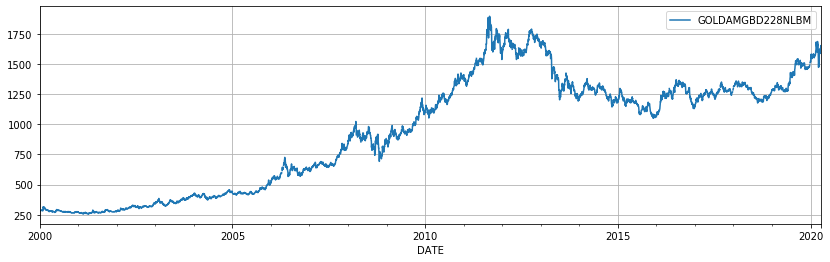

In [54]:
df_gold.plot()
plt.show()

###### 국제 은가격

>* https://www.quandl.com/ 다양한 금융, 경제 데이터와 API를 제공)
* "LBMA/SILVER", 런던 금시장협회 (LBMA) 은 가격

In [55]:
# 영국 은
df_silver = pdr.DataReader("LBMA/SILVER",'quandl',start='2000-01-01')
print('row count :',len(df_silver))
display(df_silver.tail())
df_silver['USD'].plot()

ValueError: The Quandl API key must be provided either through the api_key variable or through the environmental variable QUANDL_API_KEY.

##### 국제 구리가격
* 런던 금속 거래소(London Metal Exchange), 전 세계 비철금속거래의 지표
* Cash(현금가격) 3Months(3개월 선물가격),15Months(15개월 선물가격 등)
* "LME/PR_CU"

In [59]:
# LME 구리가격
df_copper = pdr.DataReader("LME/PR_CU",'quandl',start='2000-01-01')
print(len(df_copper))
display(df_copper.tail())
df_copper["CashSeller&Settlement"].plot()
plt.show()

ValueError: The Quandl API key must be provided either through the api_key variable or through the environmental variable QUANDL_API_KEY.

### 국제 원유 가격
국제 원유 가격을 대표하는 3대 유종이 있으며, 생산지와 대표적인 소비지역이 다르다.

1. 서부 텍사스 중질유 (POILWTIUSDM): 국제 원유가격을 대표
2. 두바이유 (POILDUBUSDM): 한국이 주로 수입(국내 유가에 영향)
3. 북해 브렌트유 (POILBREUSDM): 북해에서 생산, 유럽과 아프리카에서 소비

FRED 링크는 각각 다음과 같다.

* 서부 텍사스 중질유(WTI Crude): https://fred.stlouisfed.org/series/POILWTIUSDM,
* 두바이유 (Dubai Crude): https://fred.stlouisfed.org/series/POILDUBUSDM
* 북해 브렌트유(Brent Crude): https://fred.stlouisfed.org/series/POILBREUSDM

243


,POILWTIUSDM
DATE,
2019-11-01,57.110476
2019-12-01,59.857727
2020-01-01,57.714783
2020-02-01,50.601500
2020-03-01,29.877273


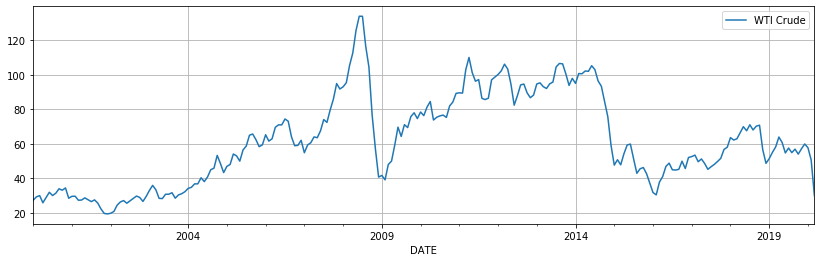

In [62]:
# 1. 서부 텍사스 중질유(WTI Crude), monthly
df_wt = pdr.DataReader("POILWTIUSDM",'fred',start="2000-01-01")
print(len(df_wt))
display(df_wt.tail())
df_wt.columns = ["WTI Crude"]
df_wt.plot()
plt.show()

243


,POILDUBUSDM
DATE,
2019-11-01,61.407619
2019-12-01,64.477273
2020-01-01,63.732174
2020-02-01,54.512500
2020-03-01,33.750000


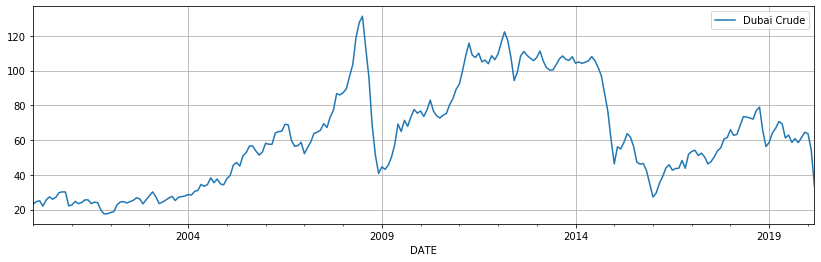

In [63]:
# 2. 두바이유(Dubai Crude), monthly
df_dut = pdr.DataReader("POILDUBUSDM",'fred',start="2000-01-01")
print(len(df_dut))
display(df_dut.tail())
df_dut.columns = ["Dubai Crude"]
df_dut.plot()
plt.show()

##### 두가지 이상의 유가 보기

DataReader 함수의 항목을 리스트로 전달하면 여러 항목의 데이터를 한꺼번에 볼 수 있다.

243


,POILWTIUSDM,POILDUBUSDM
DATE,,
2019-11-01,57.110476,61.407619
2019-12-01,59.857727,64.477273
2020-01-01,57.714783,63.732174
2020-02-01,50.601500,54.512500
2020-03-01,29.877273,33.750000


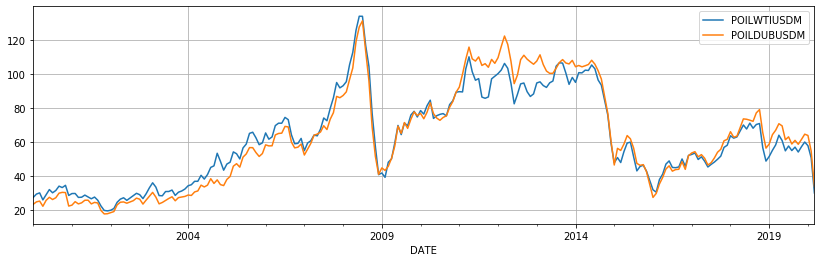

In [67]:
# POILWTIUSDM  : 서부 텍사스 중질유
# POILDUBUSDM : 두바이유
df_oil = pdr.DataReader(['POILWTIUSDM','POILDUBUSDM'],'fred',start = '2000-01-01')
print(len(df_oil))
display(df_oil.tail())
df_oil.plot()
plt.show()

In [68]:
# 두 가격의 차이
# 두 가격은 거의 같으나 약간의 차이가 있다. 이 차이를 한번에 나타낸 
# 데이터 분석, 즉 시각화를 실행
df_oil['diff'] = df_oil['POILDUBUSDM'] -df_oil['POILWTIUSDM']
df_oil.tail()

,POILWTIUSDM,POILDUBUSDM,diff
DATE,,,
2019-11-01,57.110476,61.407619,4.297143
2019-12-01,59.857727,64.477273,4.619545
2020-01-01,57.714783,63.732174,6.017391
2020-02-01,50.601500,54.512500,3.911000
2020-03-01,29.877273,33.750000,3.872727


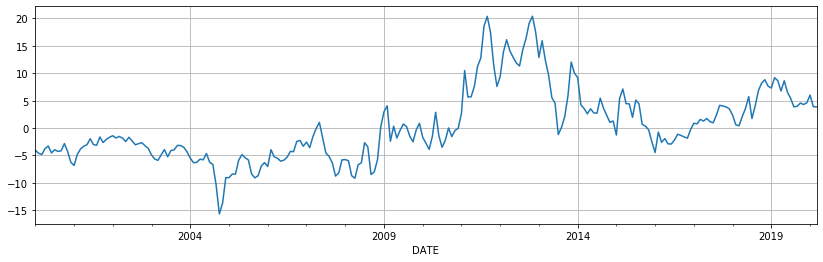

In [70]:
df_oil['diff'].plot()
plt.show()

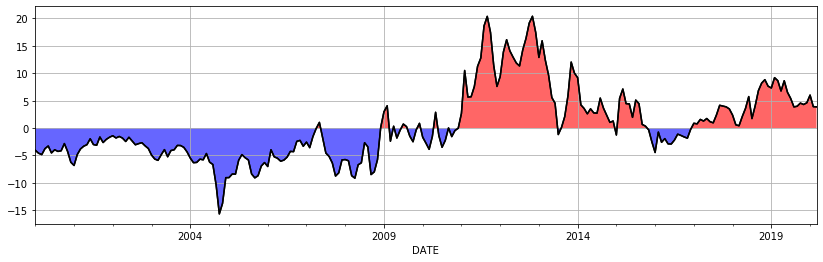

In [77]:
# 가격의 차이를 좀 더 명확하게 표현하기
# 0을 기준으로 낮으면 파란색, 높으면 빨간색으로 표시
ax = df_oil['diff'].plot(color='k')
x = df_oil['diff'].plot(color='k')
x = df_oil.index
y = df_oil['diff']

ax.fill_between(x, 0, y, where=y>0, facecolor='r', alpha=0.6, interpolate=True)
ax.fill_between(x, 0, y, where=y<=0, facecolor='b', alpha=0.6, interpolate=True)
